<a href="https://colab.research.google.com/github/honhon13/sample/blob/main/Haus%C3%BCbung_02_statistical_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Aufgabe 8
import statsmodels.api as sm
import pandas as pd

In [3]:
auto_data = pd.read_csv("Auto.csv")
auto_data = auto_data.dropna()

In [4]:
X = sm.add_constant(auto_data['horsepower']) # Konstante hinzufügen
y = auto_data['mpg']

In [5]:
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.606
Model:                            OLS   Adj. R-squared:                  0.605
Method:                 Least Squares   F-statistic:                     599.7
Date:                Sat, 11 Jan 2025   Prob (F-statistic):           7.03e-81
Time:                        10:24:59   Log-Likelihood:                -1178.7
No. Observations:                 392   AIC:                             2361.
Df Residuals:                     390   BIC:                             2369.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         39.9359      0.717     55.660      0.0

In [6]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'MPG')

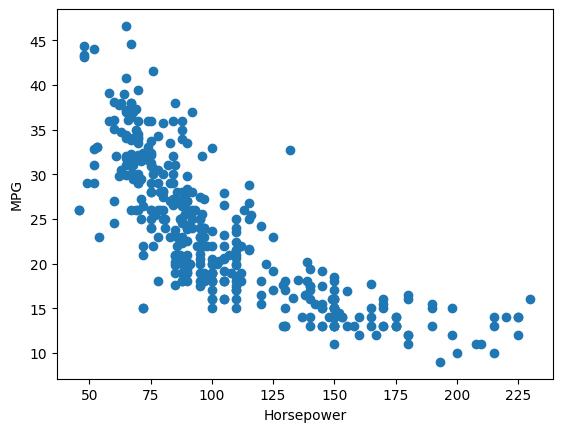

In [7]:
plt.scatter(auto_data['horsepower'], auto_data['mpg'],
label="Datenpunkte")
plt.xlabel("Horsepower")
plt.ylabel("MPG")

<ipython-input-8-725d1f91ed32>:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  ax.axline((0, model.params[0]), slope=model.params[1], color='red',


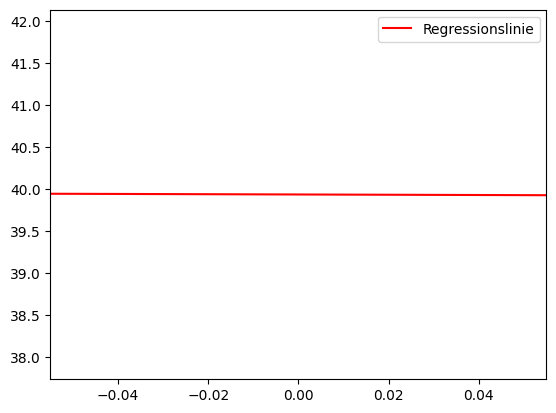

In [8]:
ax = plt.gca()
ax.axline((0, model.params[0]), slope=model.params[1], color='red',
label="Regressionslinie")
plt.legend()
plt.show()

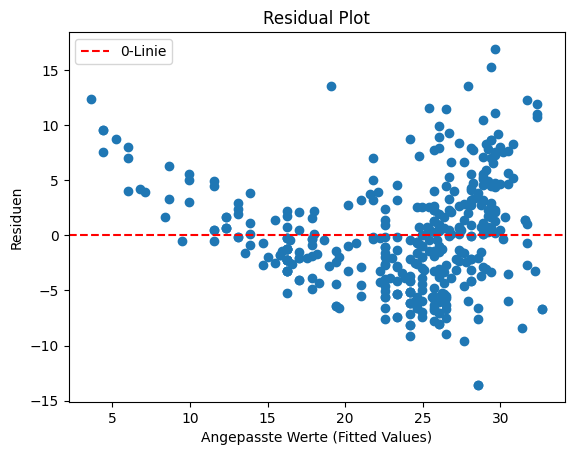

In [13]:
residuals = model.resid
fitted = model.fittedvalues
plt.scatter(fitted, residuals)
plt.axhline(0, color='red', linestyle='--', label="0-Linie")
plt.xlabel("Angepasste Werte (Fitted Values)")
plt.ylabel("Residuen")
plt.title("Residual Plot")
plt.legend()
plt.show()

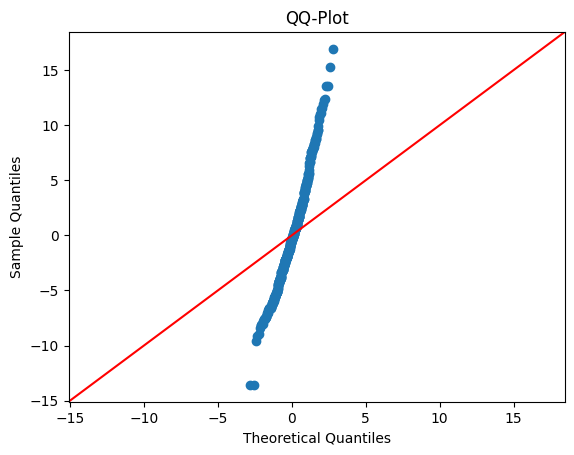

In [14]:
sm.qqplot(residuals, line='45')
plt.title("QQ-Plot")
plt.show()

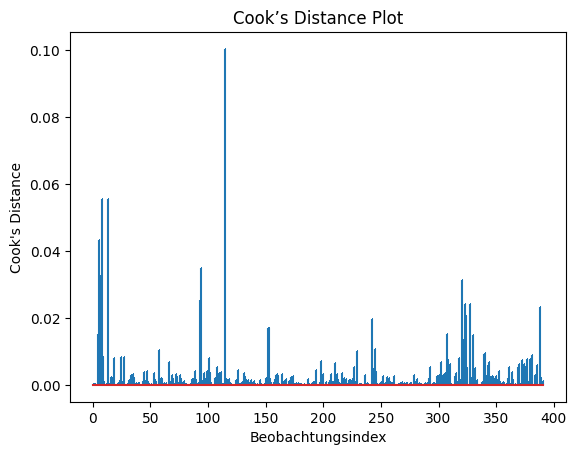

In [15]:
infl = model.get_influence()
cooks = infl.cooks_distance[0]
plt.stem(range(len(cooks)), cooks, markerfmt=",")
plt.xlabel("Beobachtungsindex")
plt.ylabel("Cook's Distance")
plt.title("Cook’s Distance Plot")
plt.show()